#### Credit score Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Importing Dataset**

Reference:
[https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv)

In [2]:
data_train = pd.read_csv("dataset.csv")

In [3]:
data_train.head()


,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


**Information about Dataset**

In [4]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  object 
 1   CustomerID              100000 non-null  object 
 2   Month                   100000 non-null  object 
 3   Name                    90015 non-null   object 
 4   Age                     100000 non-null  int64  
 5   SSN                     100000 non-null  object 
 6   Occupation              92938 non-null   object 
 7   AnnualIncome            100000 non-null  float64
 8   MonthlyInhandSalary     84998 non-null   float64
 9   NumBankAccounts         100000 non-null  int64  
 10  NumCreditCard           100000 non-null  int64  
 11  InterestRate            100000 non-null  int64  
 12  NumofLoan               100000 non-null  int64  
 13  TypeofLoan              88592 non-null   object 
 14  Delayfromduedate     

**Mean, Median, Variance, Standard Deviation, and Central Tendancy**

In [5]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
AnnualIncome,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
MonthlyInhandSalary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
NumBankAccounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
NumCreditCard,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
InterestRate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
NumofLoan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delayfromduedate,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
NumofDelayedPayment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
ChangedCreditLimit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01


# Null Values Handling

In [6]:
data_train.isnull().sum()

ID                            0
CustomerID                    0
Month                         0
Name                       9985
Age                           0
SSN                           0
Occupation                 7062
AnnualIncome                  0
MonthlyInhandSalary       15002
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
TypeofLoan                11408
Delayfromduedate              0
NumofDelayedPayment        7002
ChangedCreditLimit         2091
NumCreditInquiries         1965
CreditMix                 20195
OutstandingDebt               0
CreditUtilizationRatio        0
CreditHistoryAge           9030
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      4479
PaymentBehaviour              0
MonthlyBalance             1200
CreditScore                   0
dtype: int64

**
ID,SSN,Name, CustomerID will not contribute to the credit score, and are unique to each data point. Let's drop these columns **

In [7]:
data_train = data_train.drop(['ID', 'SSN', 'Name', 'CustomerID'], axis = 1)


In [8]:
data_train.isnull().sum()

Month                         0
Age                           0
Occupation                 7062
AnnualIncome                  0
MonthlyInhandSalary       15002
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
TypeofLoan                11408
Delayfromduedate              0
NumofDelayedPayment        7002
ChangedCreditLimit         2091
NumCreditInquiries         1965
CreditMix                 20195
OutstandingDebt               0
CreditUtilizationRatio        0
CreditHistoryAge           9030
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      4479
PaymentBehaviour              0
MonthlyBalance             1200
CreditScore                   0
dtype: int64

**Occupation, TypeofLoan need to be dropped owing to the number of missing values**

In [9]:
data_train = data_train.drop(['TypeofLoan', 'Occupation','Month'], axis = 1)


In [10]:
data_train.isnull().sum()

Age                           0
AnnualIncome                  0
MonthlyInhandSalary       15002
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        7002
ChangedCreditLimit         2091
NumCreditInquiries         1965
CreditMix                 20195
OutstandingDebt               0
CreditUtilizationRatio        0
CreditHistoryAge           9030
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      4479
PaymentBehaviour              0
MonthlyBalance             1200
CreditScore                   0
dtype: int64

**The rest of the features contribute to the credit score according to this domain. So, rather than dropping the feature, lets remove the datapoints that have null values**

In [11]:
data_train = data_train.dropna()

In [12]:
data_train.isna().sum()

Age                       0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
CreditMix                 0
OutstandingDebt           0
CreditUtilizationRatio    0
CreditHistoryAge          0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
dtype: int64

# Handling Categorical Data

In [13]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51930 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     51930 non-null  int64  
 1   AnnualIncome            51930 non-null  float64
 2   MonthlyInhandSalary     51930 non-null  float64
 3   NumBankAccounts         51930 non-null  int64  
 4   NumCreditCard           51930 non-null  int64  
 5   InterestRate            51930 non-null  int64  
 6   NumofLoan               51930 non-null  int64  
 7   Delayfromduedate        51930 non-null  int64  
 8   NumofDelayedPayment     51930 non-null  float64
 9   ChangedCreditLimit      51930 non-null  float64
 10  NumCreditInquiries      51930 non-null  float64
 11  CreditMix               51930 non-null  object 
 12  OutstandingDebt         51930 non-null  float64
 13  CreditUtilizationRatio  51930 non-null  float64
 14  CreditHistoryAge        51930 non-null

In [14]:
Categorical_features = ['CreditMix','CreditHistoryAge','PaymentofMinAmount','PaymentBehaviour','CreditScore']

In [15]:
data_train[Categorical_features]

,CreditMix,CreditHistoryAge,PaymentofMinAmount,PaymentBehaviour,CreditScore
6,Good,22 Years and 7 Months,No,LowspentSmallvaluepayments,Good
8,Good,26 Years and 7 Months,No,LowspentSmallvaluepayments,Standard
9,Good,26 Years and 8 Months,No,HighspentLargevaluepayments,Good
12,Good,26 Years and 11 Months,No,LowspentSmallvaluepayments,Good
13,Good,27 Years and 0 Months,No,HighspentLargevaluepayments,Good
...,...,...,...,...,...
99986,Bad,5 Years and 10 Months,Yes,LowspentSmallvaluepayments,Poor
99989,Bad,6 Years and 1 Months,Yes,!@9#%8,Standard
99991,Bad,6 Years and 3 Months,Yes,HighspentLargevaluepayments,Standard
99997,Good,31 Years and 8 Months,No,HighspentLargevaluepayments,Poor


In [16]:
for feature in Categorical_features:
    unique_values = data_train[feature].unique()
    print(f"Unique values in {feature}:")
    print(unique_values)
    

Unique values in CreditMix:
['Good' 'Standard' 'Bad']
Unique values in CreditHistoryAge:
['22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 11 Months' '27 Years and 0 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '18 Years and 1 Months'
 '18 Years and 2 Months' '18 Years and 3 Months' '18 Years and 4 Months'
 '17 Years and 3 Months' '17 Years and 4 Months' '17 Years and 5 Months'
 '17 Years and 6 Months' '17 Years and 7 Months' '30 Years and 10 Months'
 '31 Years and 2 Months' '31 Years and 3 Months' '32 Years and 0 Months'
 '32 Years and 2 Months' '30 Years and 7 Months' '30 Years and 8 Months'
 '30 Years and 9 Months' '30 Years and 11 Months' '21 Years and 4 Months'
 '21 Years and 8 Months' '21 Years and 11 Months' '26 Years and 6 Months'
 '19 Years and 2 Months' '19 Years and 3 Months' '19 Years and 5 Months'
 '19 Years and 6 Months' '19 Years and 7 Months' '19 Years and 8 Months'
 '25 Years and 5 Months' '25 Y

1. 'CreditMix' : Lets use label encoding to this, as there is a inherent relationship between the values
2. 'CreditHistoryAge' : Let's replace with the total number of months
3. 'PaymentofMinAmount' : Let's use one hot encoding as there is no inherent relationship
4. 'PaymentBehaviour' : Let's use one hot encoding as there is no inherent relationship
5. 'CreditScore' : Lets use label encoding to this, as there is a inherent relationship between the values

**Label Encoding fo the Target Variable**

References : [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['CreditScore'] = le.fit_transform(data_train['CreditScore'])


In [18]:
le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

**One-Hot Encoding for 'PaymentofMinAmount'**

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data_train['PaymentofMinAmount'].values.reshape(-1, 1))


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentofMinAmount']))
data_train = data_train.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
data_train= pd.concat([data_train, encoded_data_train], axis=1)



**'CreditHistoryAge' : Let's replace with the total number of months**

In [21]:
data_copy = data_train 

In [22]:
def getMonths(duration):
    years, months = int(duration.split()[0]), int(duration.split()[3])
    months += years * 12
    return months



In [23]:
data_copy['CreditHistoryAge'] = data_copy['CreditHistoryAge'].apply(getMonths)

**'CreditMix' : Lets use label encoding to this, as there is a inherent relationship between the values**

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy['CreditMix'] = le.fit_transform(data_copy['CreditMix'])

In [25]:
le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

**'PaymentBehaviour' : Let's use one hot encoding as there is no inherent relationship**

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data_copy['PaymentBehaviour'].values.reshape(-1, 1))
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentBehaviour']))
data_train = data_copy.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
data_train= pd.concat([data_train, encoded_data_train], axis=1)


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
data_train

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,MonthlyBalance,CreditScore,PaymentofMinAmount_No,PaymentofMinAmount_Yes,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments
0,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,...,244.565317,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,470.690627,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,484.591214,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,28,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,...,444.867032,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,...,481.505262,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51925,28,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,345.743101,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
51926,28,20002.88,1929.906667,10,8,29,5,33,25.0,16.31,...,307.659291,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
51927,29,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,337.362988,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
51928,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,...,516.809083,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Dropping the left over categorical values post one hot encoding**

In [28]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51930 entries, 0 to 51929
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            51930 non-null  int64  
 1   AnnualIncome                                   51930 non-null  float64
 2   MonthlyInhandSalary                            51930 non-null  float64
 3   NumBankAccounts                                51930 non-null  int64  
 4   NumCreditCard                                  51930 non-null  int64  
 5   InterestRate                                   51930 non-null  int64  
 6   NumofLoan                                      51930 non-null  int64  
 7   Delayfromduedate                               51930 non-null  int64  
 8   NumofDelayedPayment                            51930 non-null  float64
 9   ChangedCreditLimit                             519

In [29]:
data_train = data_train.drop(['PaymentofMinAmount', 'PaymentBehaviour'], axis = 1)


In [30]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51930 entries, 0 to 51929
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            51930 non-null  int64  
 1   AnnualIncome                                   51930 non-null  float64
 2   MonthlyInhandSalary                            51930 non-null  float64
 3   NumBankAccounts                                51930 non-null  int64  
 4   NumCreditCard                                  51930 non-null  int64  
 5   InterestRate                                   51930 non-null  int64  
 6   NumofLoan                                      51930 non-null  int64  
 7   Delayfromduedate                               51930 non-null  int64  
 8   NumofDelayedPayment                            51930 non-null  float64
 9   ChangedCreditLimit                             519

**Done with treating Categorical values**

# Checking Dataset Balance

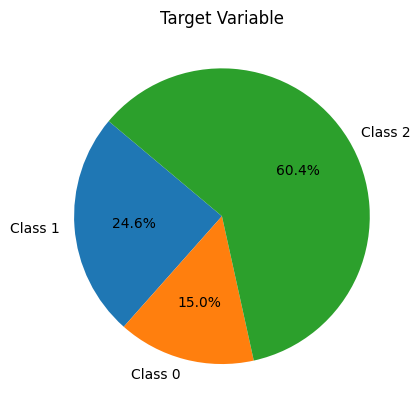

In [31]:
import matplotlib.pyplot as plt

arr_0, arr_1, arr_2 = [], [], []
for i in data_train['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)
        
Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

**Dataset looks kinda imbalanced. Let's use oversampling to increase the number of datapoints with the classes 0 and 1**

In [32]:
data_class_1 = data_train[data_train['CreditScore'] == 1]
data_class_2 = data_train[data_train['CreditScore'] == 2]
data_class_0 = data_train[data_train['CreditScore'] == 0]

data_class_1_oversampled = data_class_1.sample(Class_2, replace=True)
data_class_0_oversampled = data_class_0.sample(Class_2, replace=True)


data_oversampled = pd.concat([data_class_2, data_class_1_oversampled], axis=0)
data_oversampled = pd.concat([data_oversampled, data_class_0_oversampled], axis=0)

**Plotting the pie chart post oversampling**

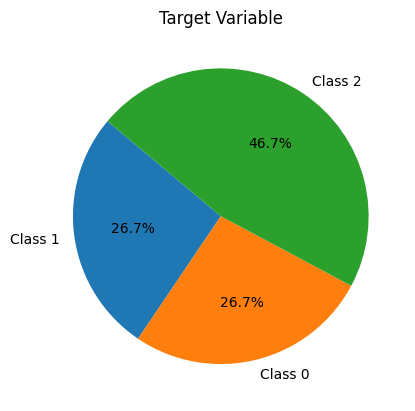

In [33]:
arr_0, arr_1, arr_2 = [], [], []
for i in data_oversampled['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)
        
Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

**Done with Data Balancing**

# Feature Analysis

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

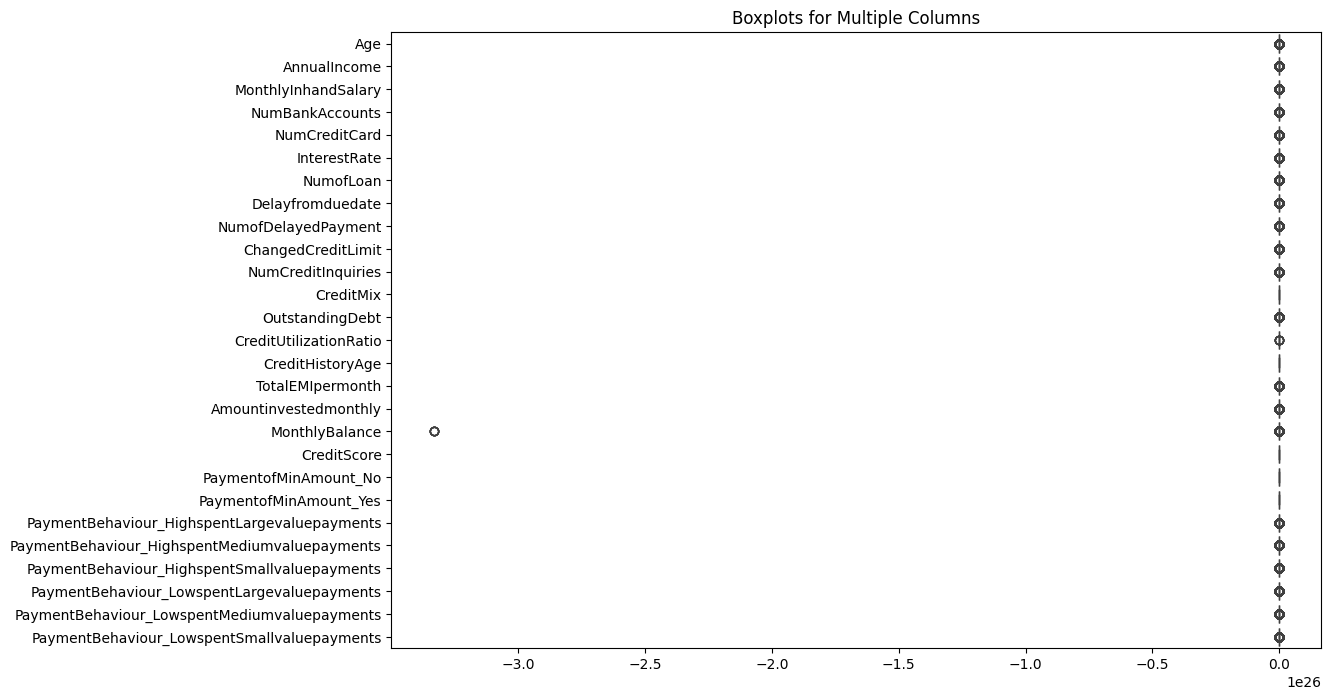

In [34]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_oversampled, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

**There is an outlier in the MonthlyBalance that is effecting this plot. Before we handle it, lets check the skewness of the feature distributions**

In [35]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101607 entries, 1 to 32828
Data columns (total 27 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Age                                            101607 non-null  int64  
 1   AnnualIncome                                   101607 non-null  float64
 2   MonthlyInhandSalary                            101607 non-null  float64
 3   NumBankAccounts                                101607 non-null  int64  
 4   NumCreditCard                                  101607 non-null  int64  
 5   InterestRate                                   101607 non-null  int64  
 6   NumofLoan                                      101607 non-null  int64  
 7   Delayfromduedate                               101607 non-null  int64  
 8   NumofDelayedPayment                            101607 non-null  float64
 9   ChangedCreditLimit                    

# Outlier Removal

In [36]:
df = data_oversampled.drop('CreditScore', axis = 1)

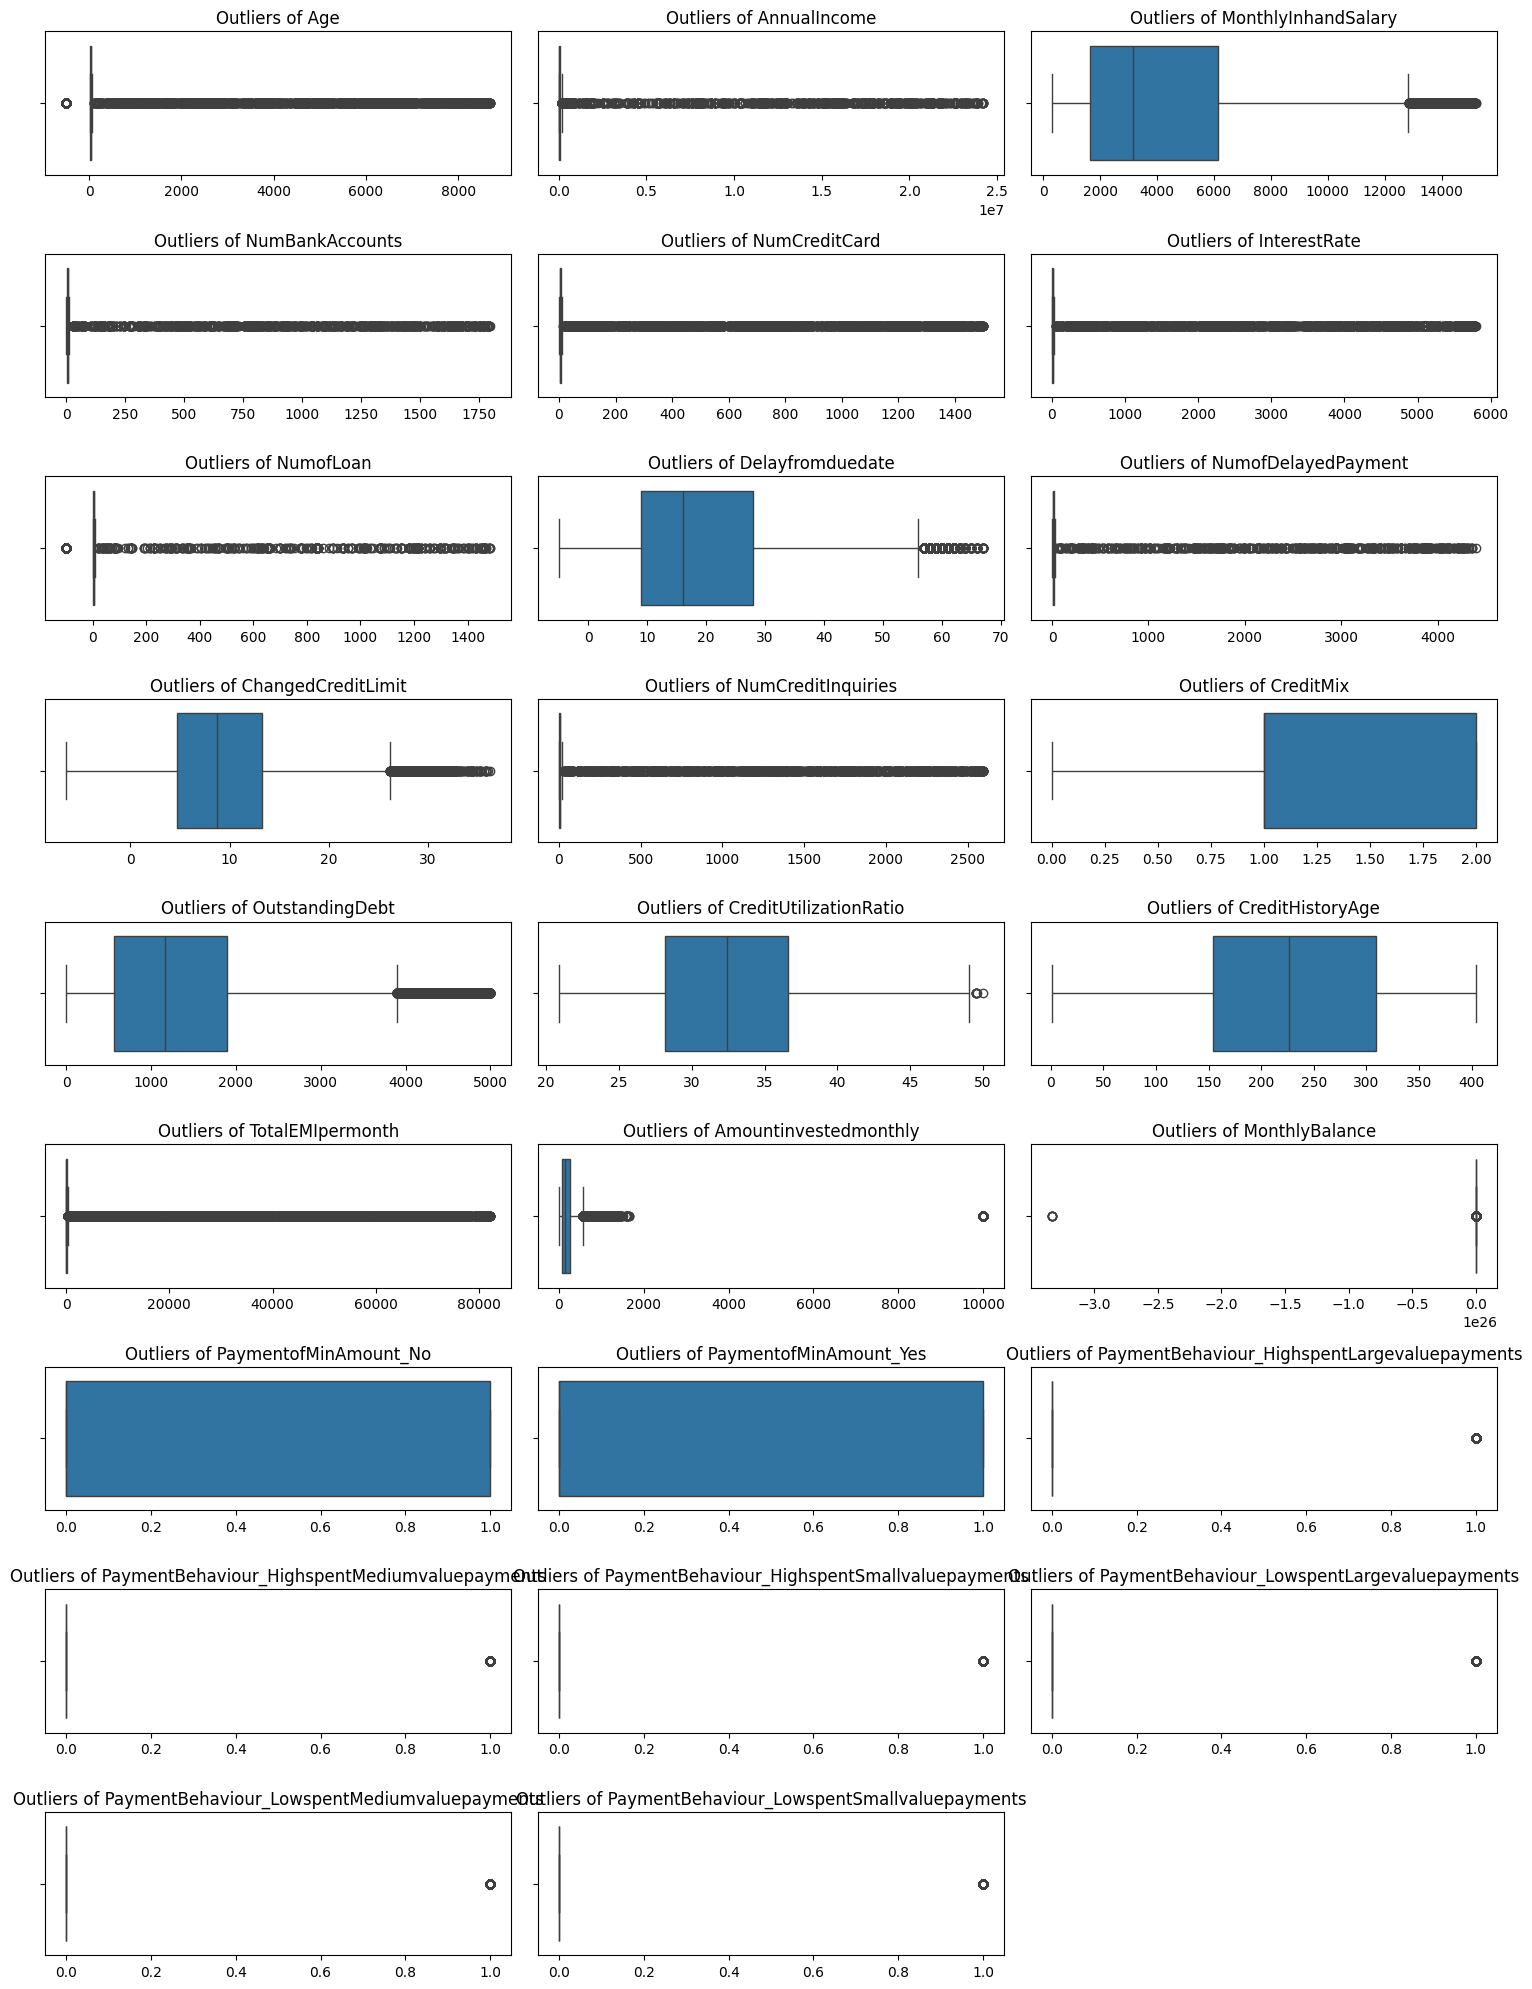

In [37]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1
for feature in df.columns:
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Outliers of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     i += 1
    
#     ax = axes[i]
#     df[feature] = yeojohnson(df[feature])[0]
#     sns.histplot(df[feature], kde=True, ax=ax) 
#     ax.set_title(f'Distribution of Transformed {feature}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')
    
for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

**Adding back the target column after plotting**

In [38]:
df['CreditScore'] = data_oversampled['CreditScore']

In [39]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

         Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  \
1      False         False                False            False   
10     False         False                False            False   
11     False         False                False            False   
12     False         False                False            False   
13     False         False                False            False   
...      ...           ...                  ...              ...   
47827  False         False                False            False   
32113  False         False                False            False   
17058  False         False                False            False   
30560  False         False                False             True   
32828  False         False                False            False   

       NumCreditCard  InterestRate  NumofLoan  Delayfromduedate  \
1              False         False      False             False   
10             False         False      False    

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

         Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  \
1      False         False                False            False   
10     False         False                False            False   
11     False         False                False            False   
12     False         False                False            False   
13     False         False                False            False   
...      ...           ...                  ...              ...   
47827  False         False                False            False   
32113  False         False                False            False   
17058  False         False                False            False   
30560  False         False                False             True   
32828  False         False                False            False   

       NumCreditCard  InterestRate  NumofLoan  Delayfromduedate  \
1              False         False      False             False   
10             False         False      False    

**We are not removing outliers from the following features in the set, as these outliers contain important information**

In [41]:
s = set([
    'PaymentofMinAmount_No',
    'PaymentofMinAmount_Yes',
    'PaymentBehaviour_HighspentLargevaluepayments',
    'PaymentBehaviour_HighspentMediumvaluepayments',
    'PaymentBehaviour_HighspentSmallvaluepayments',
    'PaymentBehaviour_LowspentLargevaluepayments',
    'PaymentBehaviour_LowspentMediumvaluepayments',
    'PaymentBehaviour_LowspentSmallvaluepayments',
    'Age',
    'NumBankAccounts',
    'NumCreditCard',
    'InterestRate',
    'NumofLoan',
    'NumofDelayedPayment',
    'NumCreditInquiries'
])


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in df.columns:
    if column in s:
        continue
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

print(df)

       Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  NumCreditCard  \
1       28     34847.840          3037.986667                2              4   
12      54     30689.890          2612.490833                2              5   
13      54     30689.890          2612.490833                2              5   
14      55     30689.890          2612.490833                2              5   
15      55     30689.890          2612.490833                2              5   
...    ...           ...                  ...              ...            ...   
50220   38     86142.960          7274.580000                0              1   
47827   41     14468.225          1342.685417                4              7   
17058   25     34898.900          2787.832346                7              4   
30560   41     95895.720          7851.310000                0              5   
32828   33     44264.410          3755.700833                3              3   

       InterestRate  NumofL

References : [https://seaborn.pydata.org/generated/seaborn.boxplot.html](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

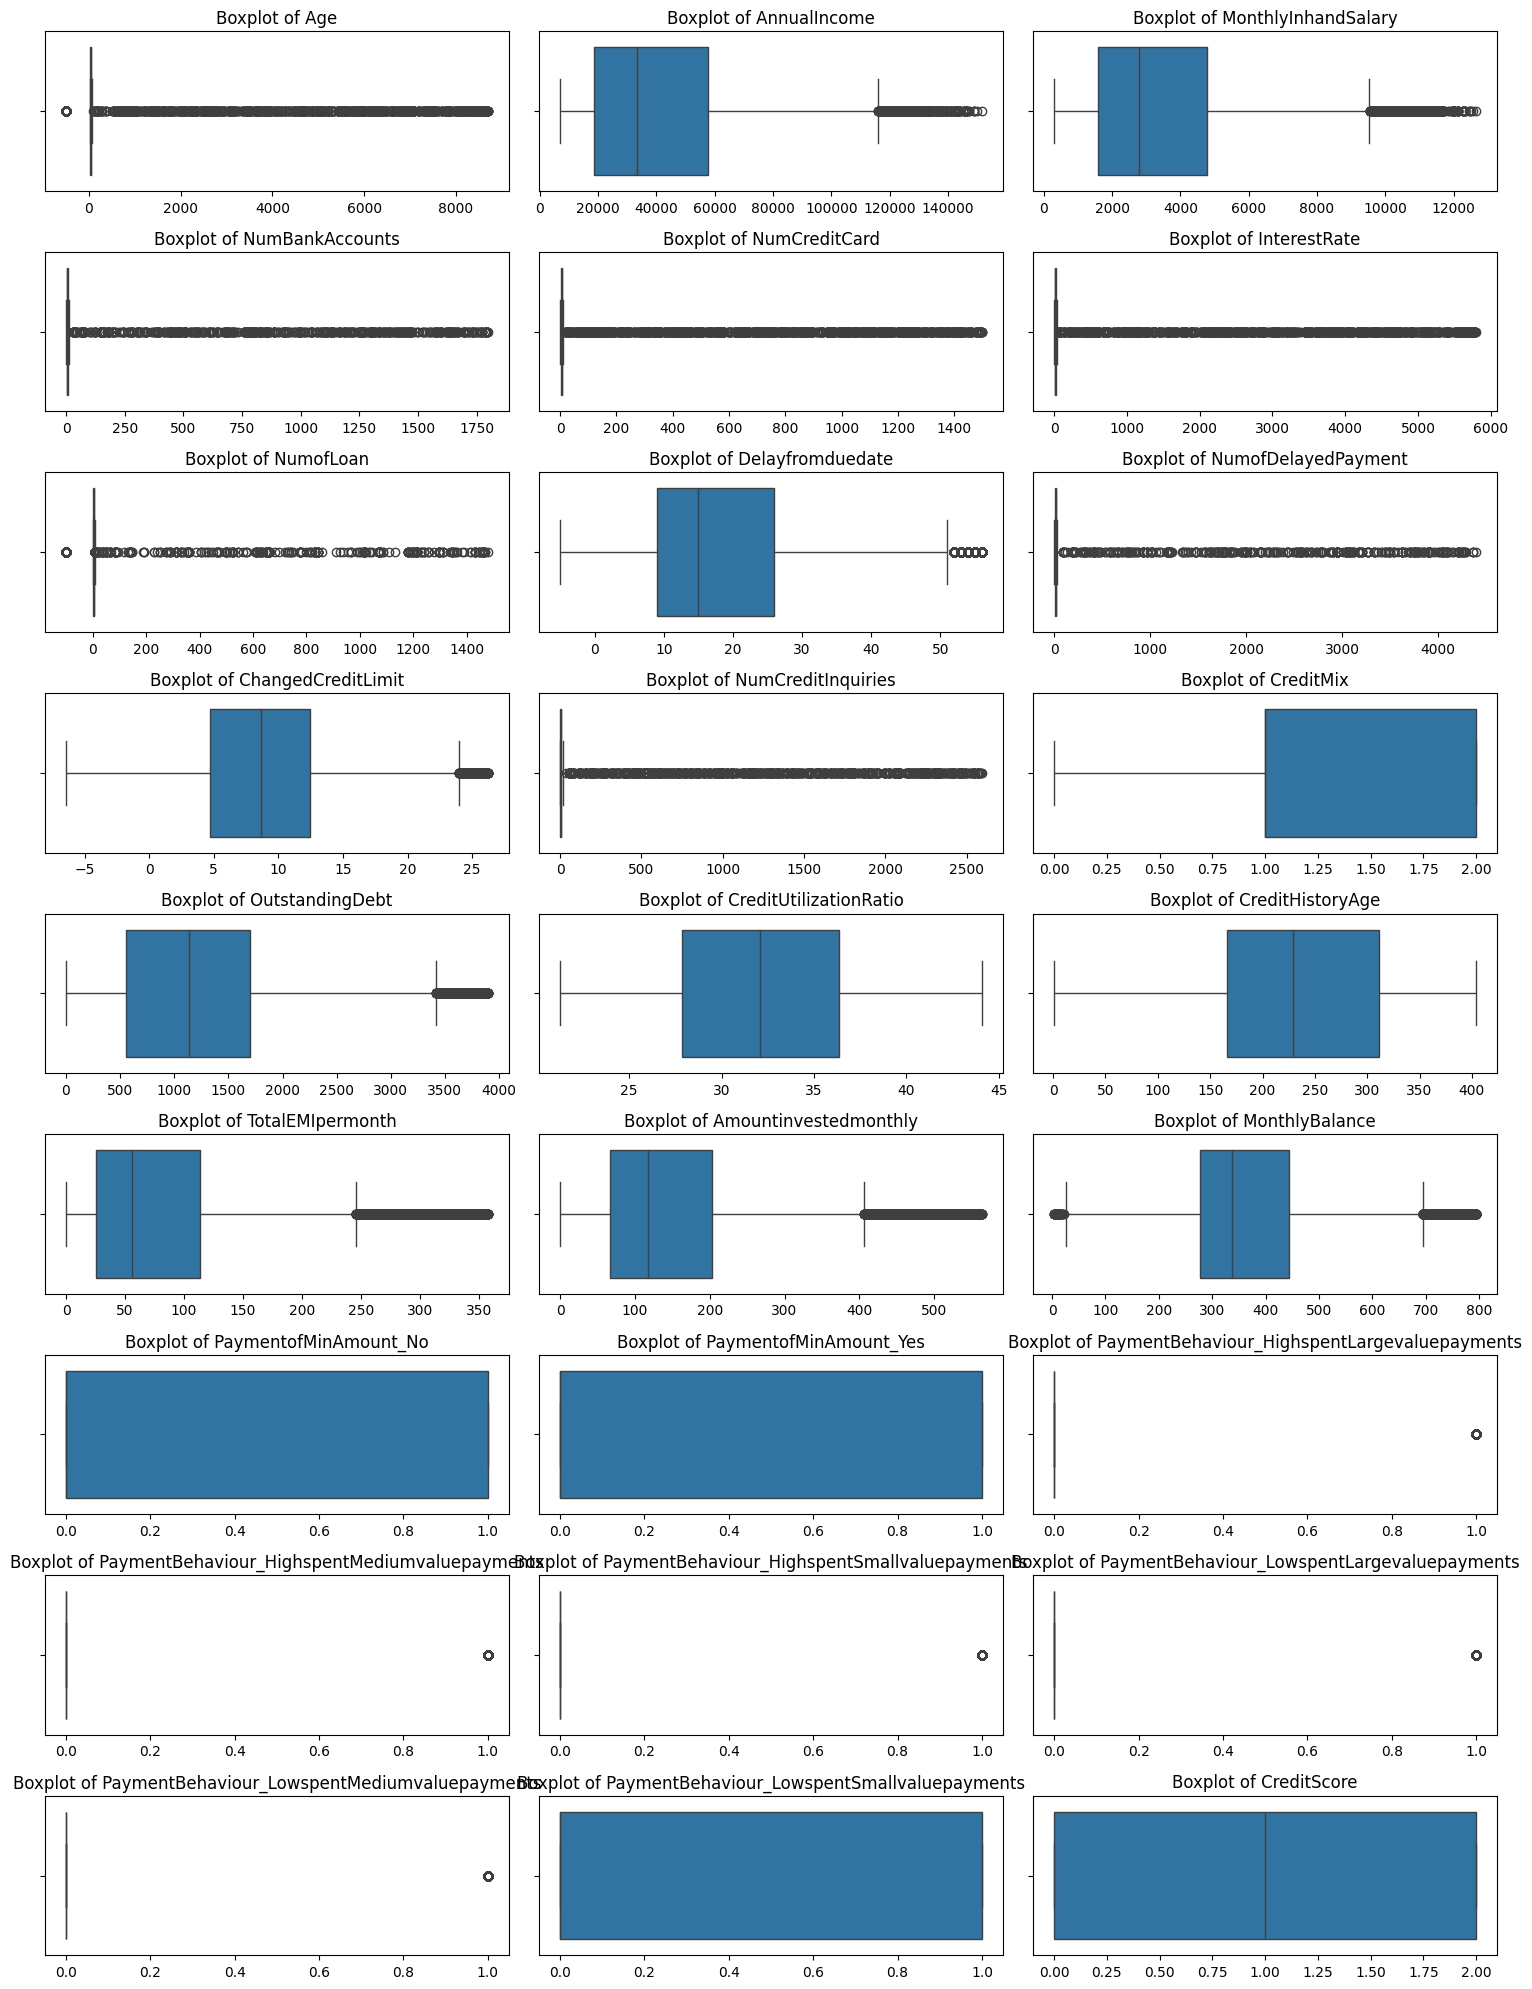

In [42]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1

for feature in df.columns:
    
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     i += 1
    
#     ax = axes[i]
#     df[feature] = yeojohnson(df[feature])[0]
#     sns.histplot(df[feature], kde=True, ax=ax) 
#     ax.set_title(f'Distribution of Transformed {feature}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')
    
for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [43]:
df.reset_index(drop=True)

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,MonthlyBalance,PaymentofMinAmount_No,PaymentofMinAmount_Yes,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,CreditScore
0,28,34847.840,3037.986667,2,4,6,1,3,4.0,5.42,...,470.690627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,54,30689.890,2612.490833,2,5,4,1,0,6.0,1.99,...,433.604773,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,54,30689.890,2612.490833,2,5,4,1,5,3.0,1.99,...,409.951812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,55,30689.890,2612.490833,2,5,4,1,3,9.0,1.99,...,411.427123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
4,55,30689.890,2612.490833,2,5,4,1,7,6.0,-2.01,...,262.499594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69586,38,86142.960,7274.580000,0,1,7,3,-3,8.0,0.68,...,345.383219,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
69587,41,14468.225,1342.685417,4,7,12,2,5,7.0,2.65,...,346.327000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
69588,25,34898.900,2787.832346,7,4,7,2,13,14.0,18.48,...,436.750894,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
69589,41,95895.720,7851.310000,0,5,3,3,10,9.0,-0.25,...,564.148190,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


Text(0.5, 1.0, 'Boxplots for Multiple Columns')

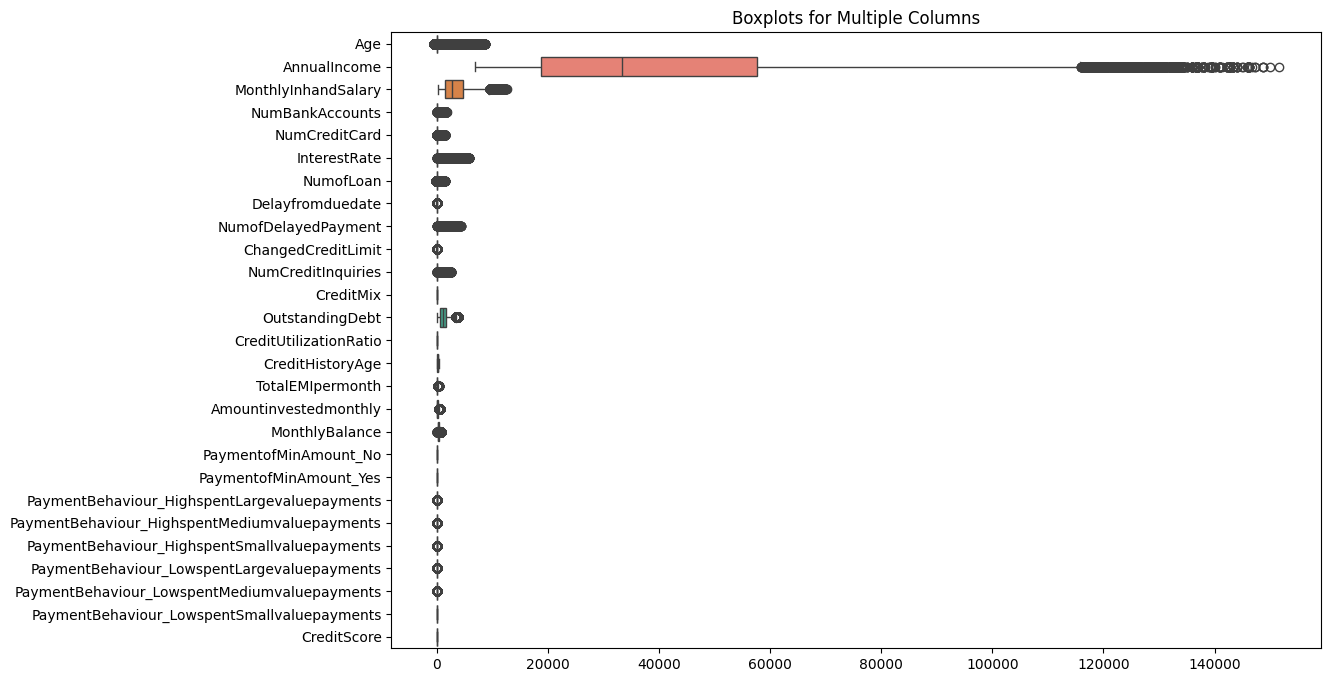

In [44]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=df, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

# Feature Scaling


**Scaling post outlier removal**

In [45]:
df_without_outliers  = df.copy()

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

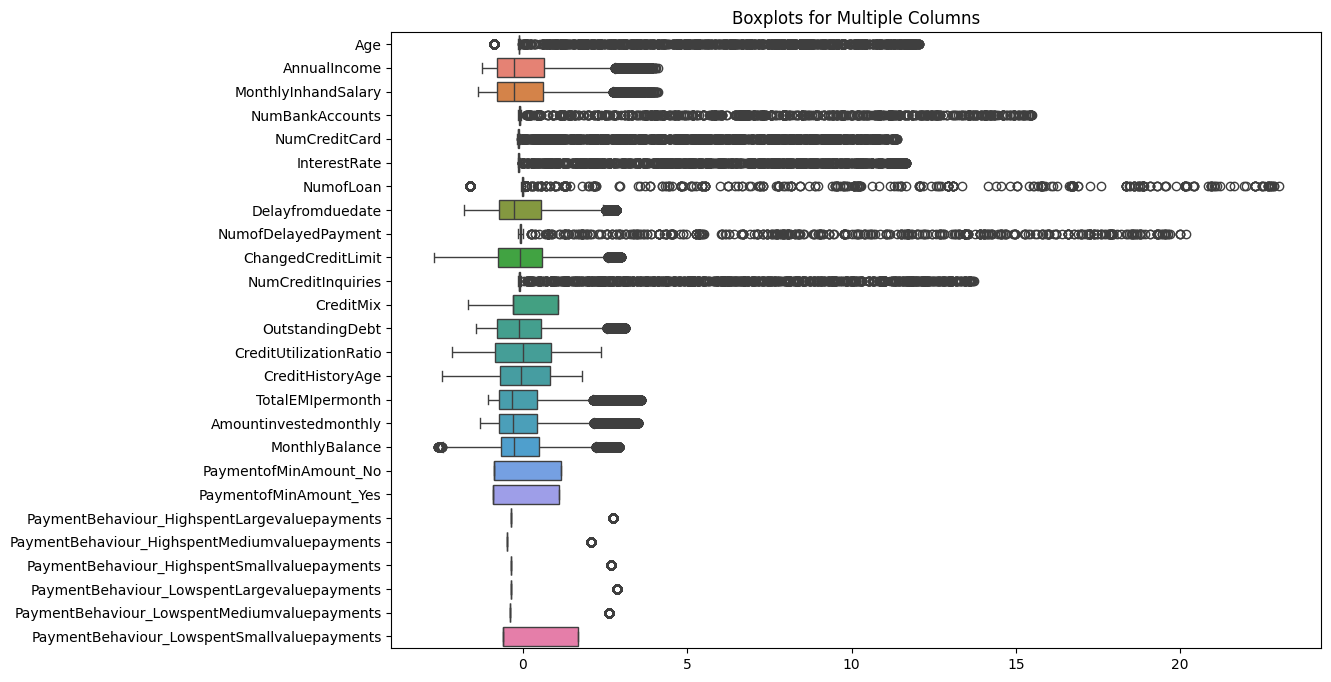

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = sc.transform(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns = df_without_outliers.drop('CreditScore', axis = 1).columns)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_oversampled_normalized_without_outliers, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

**The outliers that are seen here might be containing some important inforamtion, due to which we have made the decision of not removing them.**

In [47]:
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns=df_without_outliers.columns.difference(['CreditScore']))


In [48]:
data_oversampled_normalized_without_outliers['CreditScore'] = df_without_outliers.reset_index()['CreditScore']


In [49]:
data_oversampled_normalized_without_outliers

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,...,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,PaymentofMinAmount_No,PaymentofMinAmount_Yes,TotalEMIpermonth,CreditScore
0,-0.124395,-0.413876,-0.205065,-0.647159,0.909990,-0.300304,-1.515746,-1.180499,-0.143385,0.675060,...,-0.3657,-0.485333,-0.372010,-0.347445,-0.379505,1.679444,1.152965,-0.909166,-0.805624,2
1,-0.087881,-0.610456,-0.359224,-1.244381,-0.275376,-0.300304,-1.102246,-1.407076,-0.147461,0.416250,...,-0.3657,-0.485333,-0.372010,2.878151,-0.379505,-0.595435,1.152965,-0.909166,-0.836901,2
2,-0.087881,-0.238374,-0.359224,-1.244381,-0.264793,-0.300304,0.634238,-1.029449,-0.147461,0.251184,...,-0.3657,-0.485333,-0.372010,-0.347445,-0.379505,1.679444,1.152965,-0.909166,-0.836901,2
3,-0.086477,-0.591894,-0.359224,-1.244381,-0.254209,-0.300304,0.042111,-1.180499,-0.147461,0.261480,...,-0.3657,2.060442,-0.372010,-0.347445,-0.379505,-0.595435,-0.867329,-0.909166,-0.836901,2
4,-0.086477,1.018455,-0.359224,-1.940849,-0.243626,-0.300304,1.201229,-0.878398,-0.147461,-0.777836,...,-0.3657,-0.485333,-0.372010,-0.347445,-0.379505,1.679444,1.152965,-0.909166,-0.836901,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69586,-0.110351,3.267405,1.696736,-1.472474,0.190303,-0.300304,-1.588927,-1.633652,-0.141346,-0.199419,...,-0.3657,-0.485333,-0.372010,2.878151,-0.379505,-0.595435,1.152965,-0.909166,0.459062,0
69587,-0.106138,-1.048009,-0.960653,-1.129463,0.857072,-0.300304,0.603308,-1.029449,-0.131154,-0.192832,...,-0.3657,-0.485333,2.688101,-0.347445,-0.379505,-0.595435,1.152965,-0.909166,-0.815648,0
69588,-0.128608,-0.548232,-0.203172,1.626812,0.190303,1.063291,-1.383962,-0.425246,-0.141346,0.438206,...,-0.3657,2.060442,-0.372010,-0.347445,-0.379505,-0.595435,-0.867329,-0.909166,3.185284,0
69589,-0.106138,1.392073,2.058327,-1.634403,0.867655,-0.300304,-0.606351,-0.651822,-0.149500,1.327270,...,-0.3657,-0.485333,2.688101,-0.347445,-0.379505,-0.595435,1.152965,-0.909166,1.096429,0


In [50]:
df2 = data_oversampled_normalized_without_outliers.copy()

In [51]:
df2

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,...,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,PaymentofMinAmount_No,PaymentofMinAmount_Yes,TotalEMIpermonth,CreditScore
0,-0.124395,-0.413876,-0.205065,-0.647159,0.909990,-0.300304,-1.515746,-1.180499,-0.143385,0.675060,...,-0.3657,-0.485333,-0.372010,-0.347445,-0.379505,1.679444,1.152965,-0.909166,-0.805624,2
1,-0.087881,-0.610456,-0.359224,-1.244381,-0.275376,-0.300304,-1.102246,-1.407076,-0.147461,0.416250,...,-0.3657,-0.485333,-0.372010,2.878151,-0.379505,-0.595435,1.152965,-0.909166,-0.836901,2
2,-0.087881,-0.238374,-0.359224,-1.244381,-0.264793,-0.300304,0.634238,-1.029449,-0.147461,0.251184,...,-0.3657,-0.485333,-0.372010,-0.347445,-0.379505,1.679444,1.152965,-0.909166,-0.836901,2
3,-0.086477,-0.591894,-0.359224,-1.244381,-0.254209,-0.300304,0.042111,-1.180499,-0.147461,0.261480,...,-0.3657,2.060442,-0.372010,-0.347445,-0.379505,-0.595435,-0.867329,-0.909166,-0.836901,2
4,-0.086477,1.018455,-0.359224,-1.940849,-0.243626,-0.300304,1.201229,-0.878398,-0.147461,-0.777836,...,-0.3657,-0.485333,-0.372010,-0.347445,-0.379505,1.679444,1.152965,-0.909166,-0.836901,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69586,-0.110351,3.267405,1.696736,-1.472474,0.190303,-0.300304,-1.588927,-1.633652,-0.141346,-0.199419,...,-0.3657,-0.485333,-0.372010,2.878151,-0.379505,-0.595435,1.152965,-0.909166,0.459062,0
69587,-0.106138,-1.048009,-0.960653,-1.129463,0.857072,-0.300304,0.603308,-1.029449,-0.131154,-0.192832,...,-0.3657,-0.485333,2.688101,-0.347445,-0.379505,-0.595435,1.152965,-0.909166,-0.815648,0
69588,-0.128608,-0.548232,-0.203172,1.626812,0.190303,1.063291,-1.383962,-0.425246,-0.141346,0.438206,...,-0.3657,2.060442,-0.372010,-0.347445,-0.379505,-0.595435,-0.867329,-0.909166,3.185284,0
69589,-0.106138,1.392073,2.058327,-1.634403,0.867655,-0.300304,-0.606351,-0.651822,-0.149500,1.327270,...,-0.3657,-0.485333,2.688101,-0.347445,-0.379505,-0.595435,1.152965,-0.909166,1.096429,0


# 1. Logistic Regression

**1. Splitting the dataset**

In [52]:
X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**2. Training the logistic Regression Model**

In [54]:
from sklearn.linear_model import LogisticRegression

# Using the One vs Rest approach
logistic_regression_model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_regression_model_ovr.fit(X_train, y_train)
y_pred_ovr = logistic_regression_model_ovr.predict(X_test)

# using the Multinomial Regression employing the softmax approach
logistic_regression_model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_regression_model_multinomial.fit(X_train, y_train)
y_pred_multinomial = logistic_regression_model_multinomial.predict(X_test)

**3. Evaluation Metrics**

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluating the One vs Rest Model
print("OvR Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ovr):.2f}')

# Evaluating the Softmax (Multinomial) Model
print("\nSoftmax (Multinomial) Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_multinomial):.2f}')


OvR Model:
Accuracy: 0.71

Softmax (Multinomial) Model:
Accuracy: 0.72


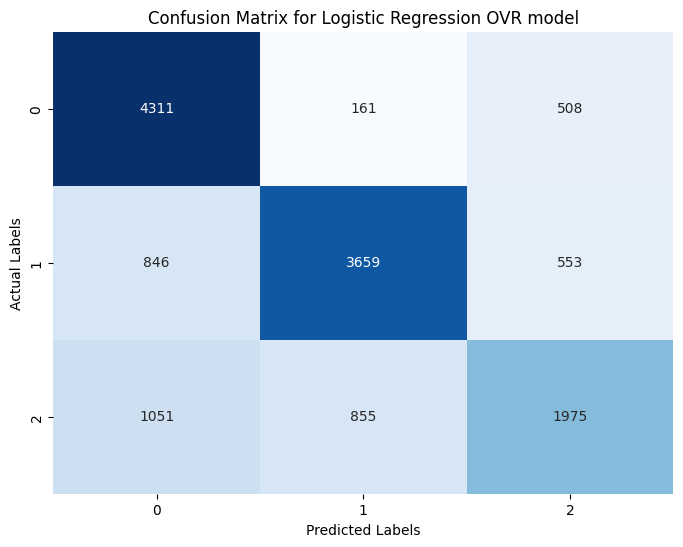

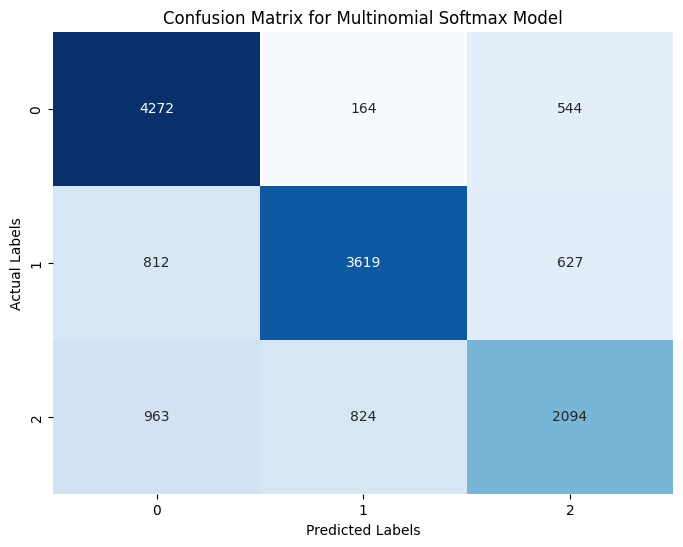

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ovr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic Regression OVR model')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_multinomial), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Multinomial Softmax Model')
plt.show()

# 2. Naive Bayes

**1. Splitting the Dataset**

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Splitting the dataset
X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




**2. Scaling the negative values in the dataset**

In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**3. Fitting the model and Predicting**

In [59]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_scaled, y_train)
y_pred = naive_bayes_model.predict(X_test_scaled)

**4. Evaluating the Model**

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


**5. Plotting the Confusion Matrix**

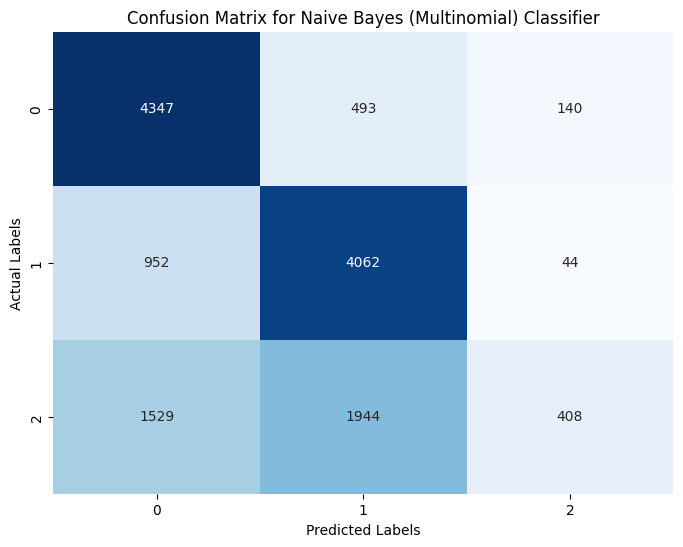

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Naive Bayes (Multinomial) Classifier')
plt.show()

# 3. KNN Model

**1. Splitting the Dataset**

In [62]:
from sklearn.neighbors import KNeighborsClassifier

X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2. Fitting the Model and Predicting**

In [63]:
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

**3. Evaluation Metrics**

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      4980
           1       0.78      0.84      0.81      5058
           2       0.76      0.49      0.60      3881

    accuracy                           0.77     13919
   macro avg       0.77      0.75      0.75     13919
weighted avg       0.77      0.77      0.76     13919



**4. Plotting the Confusion Matrix**

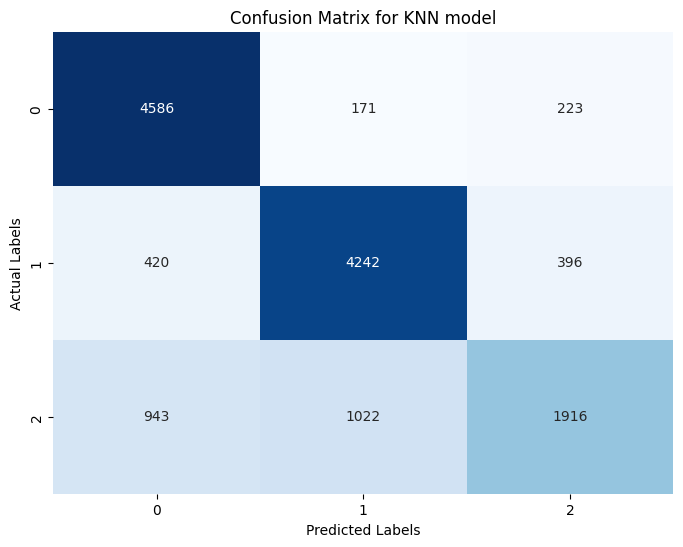

In [65]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for KNN model')
plt.show()

# 5. Random Forrest

**1. Splitting the dataset**

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2. Fitting the model and Predicting**

In [67]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

**3. Evaluating the Model**

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4980
           1       0.91      0.97      0.94      5058
           2       0.96      0.77      0.85      3881

    accuracy                           0.92     13919
   macro avg       0.93      0.91      0.92     13919
weighted avg       0.93      0.92      0.92     13919



**4. Plotting the Confusion Matrix**

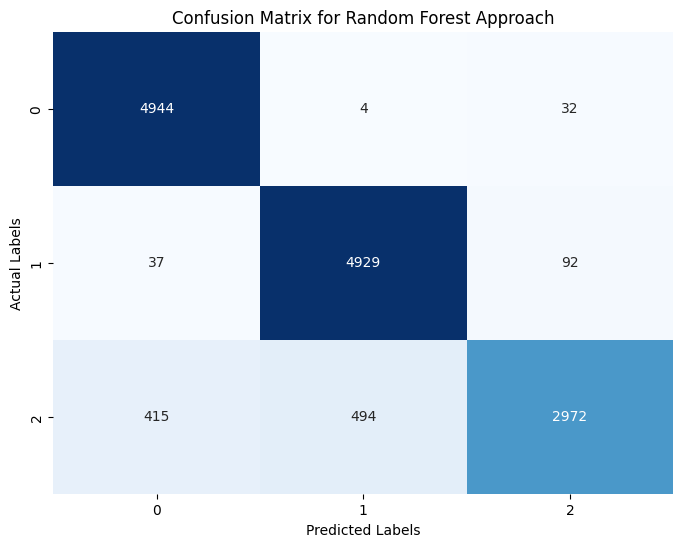

In [69]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Approach')
plt.show()